# Getting Started with the Temperature Control Laboratory

The following cells in this notebook demonstrate the use of the Temperature Control Lab. 

## TCLab Hardware

<img src='images/arduino_lab_kit.png' style="float: right;padding-left:30px;"></img>
The Temperature Control Laboratory consists of five components:

1. Arduino microcontroller board (Arduino Uno, Arduino Leonardo, or equivalents).

2. The Temperature Control Laboratory plug-in board (also known as a shield).

3. Five watt USB power supply.

4. 5.5mm to USB power supply cable.

5. USB 2.0 data cable. (w/mini-USB connector for Arduino Uno, or micro-USB cable for Arduino Leonardo.)

Before going further, be sure to complete the steps outlined under *Hardware setup* as described in TCLab [README](https://github.com/jckantor/TCLab/blob/master/README.rst). Mac OS users will need to install a serial driver available [here](https://github.com/adrianmihalko/ch340g-ch34g-ch34x-mac-os-x-driver). Normally the TCLab shield will already be mounted on the Arduino board, and the firmware driver will have been loaded on to the Arduino.

## TCLab Software
<img src='images/TCLabOverview.png' style="float: left;padding-right:30px;"></img>
**_Jupyter notebooks:_**
Examples, lessons, and student projects.

**_tclab:_**
A package to provide high-level access to sensors, heaters, a pseudo-realtime clock. The package includes `TCLab()` providing access to the device, `clock` for synchronizing with a real time clock, `Historian` for data logging and `Plotter` for realtime plotting.

**_sketch.ino:_**
Firmware for the intrisically safe operation of the Arduino board and shield.

**_Arduino:_**
Hardware platform for the Temperature Control Laboratory. Compatiable with Arduino Uno and Arduino Leonardo.

Before going further, be sure to install the `tclab` Python drivers. When used for the first time, the `tclab` package is installed with the command line

    pip install tclab

## Connecting to the Temperature Control Laboratory

TCLab() attempts to find a device connected to a serial port and returns a connection. An error is generated if no device is found.  The connection should be closed when no longer in use.

The following cell demonstrates this process, and uses the tclab `LED()` function to flash the LED on the Temperature Control Lab for a period of 10 seconds at a 100% brightness level. 

In [1]:
from tclab import TCLab

a = TCLab()
a.LED(100)
a.close()

Connecting to TCLab
TCLab Firmware Version 1.2.1 connected on port /dev/cu.wchusbserial1410
TCLab disconnected successfully.


## Using TCLab with Python's `with` statement

The Python `with` statement provides a convenient means of setting up and closing a connection to the Temperature Control Laboratory. In particular, the with statement establishes a context where a tclab instance is created, assigned to a variable, and automatically closed upon completion.

In [2]:
from tclab import TCLab

with TCLab() as a:
    a.LED(100)

Connecting to TCLab
TCLab Firmware Version 1.2.1 connected on port /dev/cu.wchusbserial1410
TCLab disconnected successfully.


The `with` statement is likely to be the most common way to connect the Temperature Control Laboratory for most uses.

## Reading Temperatures

Once a tclab instance is created and connected to a device, the temperature sensors on the temperature control lab can be acccessed with the attributes `.T1` and `.T2`.  For example, given an instance `a`, the temperatures are accessed as

    T1 = a.T1
    T2 = a.T2

Note that `a.T1` and `a.T2` are read-only properties. Any attempt to set them to a value will return a Python error.

In [3]:
from tclab import TCLab

with TCLab() as a:
    print("Temperature 1: {0:0.2f} °C".format(a.T1))
    print("Temperature 2: {0:0.2f} °C".format(a.T2))

Connecting to TCLab
TCLab Firmware Version 1.2.1 connected on port /dev/cu.wchusbserial1410
Temperature 1: 22.51 °C
Temperature 2: 22.51 °C
TCLab disconnected successfully.


## Setting Heaters

The heaters are controlled by functions`.Q1()` and `.Q2()` of a tclab instance. For example, both heaters can be set to 100% power with the functions

    a.Q1(100)
    a.Q2(100)

The device firmware limits the heaters to a range of 0 to 100%. The current value of attributes may be accessed via

    Q1 = a.Q1()
    Q2 = a.Q2()
    
Note that the retrieved values may be different due to the range-limiting enforced by the device firmware.

In [4]:
from tclab import TCLab
import time

with TCLab() as a:
    print("\nStarting Temperature 1: {0:0.2f} °C".format(a.T1),flush=True)
    print("Starting Temperature 2: {0:0.2f} °C".format(a.T2),flush=True)

    a.Q1(100)
    a.Q2(100)
    print("\nSet Heater 1:", a.Q1(), "%",flush=True)
    print("Set Heater 2:", a.Q2(), "%",flush=True)
    
    t_heat = 20
    print("\nHeat for", t_heat, "seconds")
    time.sleep(t_heat)

    print("\nTurn Heaters Off")
    a.Q1(0)
    a.Q2(0)
    print("\nSet Heater 1:", a.Q1(), "%",flush=True)
    print("Set Heater 2:", a.Q2(), "%",flush=True)
    
    print("\nFinal Temperature 1: {0:0.2f} °C".format(a.T1))
    print("Final Temperature 2: {0:0.2f} °C".format(a.T2))

Connecting to TCLab
TCLab Firmware Version 1.2.1 connected on port /dev/cu.wchusbserial1410

Starting Temperature 1: 22.51 °C
Starting Temperature 2: 22.83 °C

Set Heater 1: 100.0 %
Set Heater 2: 100.0 %

Heat for 20 seconds

Turn Heaters Off

Set Heater 1: 0.0 %
Set Heater 2: 0.0 %

Final Temperature 1: 24.44 °C
Final Temperature 2: 23.48 °C
TCLab disconnected successfully.


## Synchronizing with Real Time using `clock`

For convenience, the tclab module includes a function `clock` for synchronizing calculations with real time.  `clock(tperiod, tstep)` is a python iterator that generates a sequence of iterations over a period of `tperiod` seconds separated by `tstep` seconds. 

In [13]:
from tclab import TCLab, clock

tperiod = 10
tstep = 2
for t in clock(tperiod,tstep):
    print(t, "sec.")

0.0 sec.
2.0 sec.
4.0 sec.
5.99 sec.
7.99 sec.
9.99 sec.


## Using `clock` with TCLab

The following example shows how to integrate `clock` for use with TCLab.

In [1]:
from tclab import TCLab, clock

with TCLab() as a:   
    for t in clock(10):
        print(t,"sec., ", a.T1,"deg C, ", a.T2, "deg C")

Connecting to TCLab
TCLab Firmware Version 1.2.1 connected on port /dev/cu.wchusbserial1410
0.0 sec.,  19.93 deg C,  20.25 deg C
1.0 sec.,  19.93 deg C,  20.25 deg C
2.0 sec.,  19.93 deg C,  20.25 deg C
3.0 sec.,  19.93 deg C,  20.25 deg C
4.0 sec.,  19.61 deg C,  20.25 deg C
5.0 sec.,  20.25 deg C,  20.25 deg C
6.0 sec.,  19.93 deg C,  20.58 deg C
7.0 sec.,  19.93 deg C,  20.58 deg C
8.0 sec.,  19.61 deg C,  20.58 deg C
9.0 sec.,  19.93 deg C,  20.25 deg C
10.0 sec.,  19.93 deg C,  20.58 deg C
TCLab disconnected successfully.


## Writing and Reading TCLab Data to a File

Storing experimental data within a Jupyter notebook can be risky. Imagine ... you work, debug your experiment and code to finally get the perfect run. Later, you come back to work on your data, rerun the cell and all of the precious data is overwritten!  This can be frustrating.

A way to handle this situation is to write experimental data to a file, and read it back later for subsequent analysis.

Connecting to TCLab
TCLab Firmware Version 1.2.1 connected on port /dev/cu.wchusbserial1410
0.0 sec.,  22.19 deg C,  22.51 deg C
1.0 sec.,  22.19 deg C,  22.51 deg C
2.0 sec.,  22.19 deg C,  22.51 deg C
3.0 sec.,  22.19 deg C,  22.19 deg C
4.0 sec.,  22.19 deg C,  22.51 deg C
5.0 sec.,  22.19 deg C,  22.83 deg C
6.0 sec.,  22.19 deg C,  22.51 deg C
7.0 sec.,  22.19 deg C,  22.51 deg C
8.0 sec.,  22.19 deg C,  22.51 deg C
9.0 sec.,  22.19 deg C,  22.83 deg C
10.0 sec.,  22.19 deg C,  22.51 deg C
TCLab disconnected successfully.


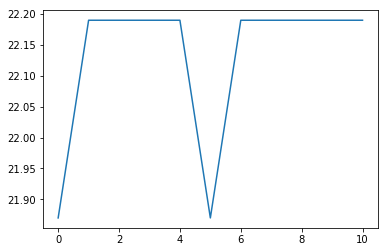

In [7]:
from tclab import TCLab, clock

tdata = []
T1data = []
T2data = []

with TCLab() as a:  
    for t in clock(10):
        print(t,"sec., ", a.T1,"deg C, ", a.T2, "deg C")
        tdata.append(t)
        T1data.append(a.T1)
        T2data.append(a.T2)
        
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(tdata,T1data)

## A Simple Thermostat

Let's build our first control system. This is a simple on/off thermostat intended to maintain temperature `T1` near a desired setpoint.

This cell has been written to print the data within the notebook and to a text data file on your harddrive.  The file is written only if `TCLab()` is successful on opening, which protects you from overwriting previous data if `TCLab()` happends to be unconnected.

In [32]:
from tclab import TCLab, clock

SP = 37     # Setpoint

with TCLab() as a:
    with open('datafile.txt', 'w') as f:
        for t in clock(150, strict=True):
            # Measure temperature
            T1 = a.T1
        
            # Compute desired heater power
            if T1 < SP:
                Q1 = 100
            elif T1 >= SP:
                Q1 = 0
        
            # Set heater power
            a.Q1(Q1)
        
            # Record current state
            f.write(str(t) + ', ' + str(Q1) + ', ' + str(T1) + '\n')
            print(t, "sec.", "Q1 = ", Q1, "%", "T1 = ", T1, "deg C")

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 23)

## Exercises

The following cells comprise the first homework submission for the course. Do your work directly inside of this notebook. Please respond to each prompt. Submit your results by uploading this notebook and the datafile created for part 4 to Vocareum. The homework is due at 5pm on Wednesday, January 24th.

#### 1. Identify your Computer

The following cell returns the identity of your computer on the campus network. We use to help validate your response to the exercises. Simply execute this cell so the results appear in your homework submission.

In [19]:
import platform
print(platform.node())

jeffreys-mbp.dhcp.nd.edu


#### 2. Temperature Control Lab

In the first lecture and in the first chapter of the textbook the terms Controlled Variables (CV), Manipulated Variables (MV), and Setpoints (SP) were defined. For the Temperature Control Lab, what are:

* Controlled Variables (CV)?
* Measured Variables?
* Manipulated Variables (MV)?

List at least two disturbance variables to which this device may be susceptable.

Your Answers:

#### 3. Python Coding

For process control, it is common practice to write the control algorithm as a separate function that can be tested and verified. For the case of the thermostat, write a simple python function named `thermostat(Tsp,Tmeas)` that takes a setpoint argument and a current temperature measurement and returns the heater input.

If it's working properly, then 

    thermostat(37,25) 
    
should return a value of 100, and 

    thermostat(40,43)
    
should return a value of 0.  The function definition should appear in the following cell.

#### 4. Thermostat Control for Temperature $T_2$

Repeat the thermostat control experiment, but using temperature $T_2$ and heater $Q_2$. Use the thermostat function you wrote for part 3. How do the results compare? What would explain the difference that you see?

Hint:  Write your script in the cell below, and execute. 